In [2]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/all_variables'

test  train


In [29]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [30]:
df_x1 = pd.read_csv("/content/drive/MyDrive/all_variables/train/X_train.csv")
df_y1 = pd.read_csv("/content/drive/MyDrive/all_variables/train/y_train.csv")
df_train = pd.concat([df_x1,df_y1], axis=1)

df_train.head()
#df_train.shape
#df_train.describe()

,Unnamed: 0,original_text,sentiment_class,is_retweeted_encoded,day,hour_posted,original_author_class,Unnamed: 0,retweet_count
0,9069,organizing building power marginalized communi...,2.0,0.0,4.0,18.0,169156.0,9069,83.0
1,2603,rt freemanilo need bbnaija year we are housema...,2.0,1.0,4.0,12.0,18220.0,2603,1350.0
2,7738,rt xhnews china inactivated covid 19 vaccine e...,1.0,1.0,4.0,17.0,189549.0,7738,6343.0
3,1579,rt sjpeace black doctor miami hero testing hom...,2.0,1.0,2.0,20.0,94628.0,1579,581.0
4,5058,rt aurobindabose1 tip recovered celebrity covi...,1.0,1.0,4.0,13.0,16234.0,5058,19.0


In [44]:
df_x2 = pd.read_csv("/content/drive/MyDrive/all_variables/test/X_test.csv")
df_y2 = pd.read_csv("/content/drive/MyDrive/all_variables/test/y_test.csv")

df_x2.head()

,Unnamed: 0,original_text,sentiment_class,is_retweeted_encoded,day,hour_posted,original_author_class
0,6252,rt davidbegnaud risk may increase medicine com...,2.0,1.0,4.0,14.0,199642.0
1,4684,rt drjanetownson free app careworkers amp mana...,2.0,1.0,4.0,13.0,215937.0
2,1731,worker community need legislation expands acce...,1.0,0.0,2.0,21.0,164047.0
3,4742,rt cravecreative i am going to something stink...,2.0,1.0,4.0,13.0,178735.0
4,4521,rt investinbrant 1 2 county brant phase 2 surv...,1.0,1.0,4.0,13.0,215711.0


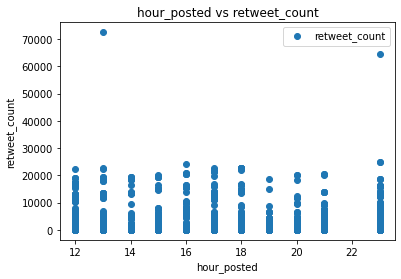

In [46]:
df_train.plot(x='hour_posted', y='retweet_count', style='o')  
plt.title('hour_posted vs retweet_count')  
plt.xlabel('hour_posted')  
plt.ylabel('retweet_count')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


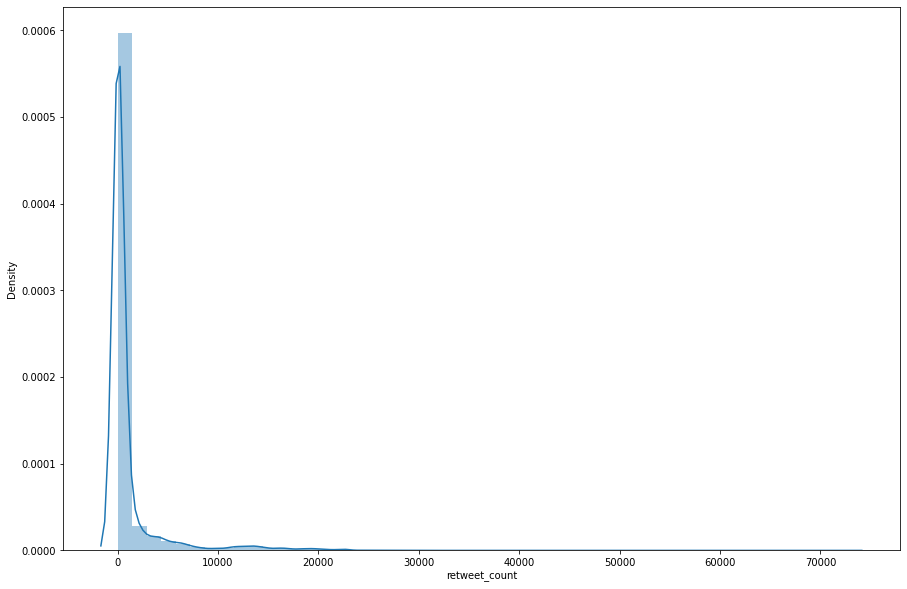

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_train['retweet_count'])

In [35]:
X_train = df_x1['hour_posted'].values.reshape(-1,1)
print(X_train)

[[18.]
 [12.]
 [17.]
 ...
 [13.]
 [21.]
 [16.]]


In [36]:
y_train = df_y1['retweet_count'].values.reshape(-1,1)
print(y_train)

[[  83.]
 [1350.]
 [6343.]
 ...
 [   9.]
 [ 670.]
 [ 113.]]


In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [38]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[269.46779919]
[[47.01596704]]


In [39]:
X_test = df_x2['day'].values.reshape(-1,1)
y_test = df_y2['retweet_count'].values.reshape(-1,1)

print(X_test)

[[4.]
 [4.]
 [2.]
 ...
 [4.]
 [4.]
 [4.]]


In [40]:
y_pred = regressor.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,375.0,457.531667
1,23.0,457.531667
2,105.0,363.499733
3,1.0,457.531667
4,265.0,457.531667
...,...,...
2995,12.0,457.531667
2996,1850.0,551.563601
2997,396.0,457.531667
2998,2059.0,457.531667


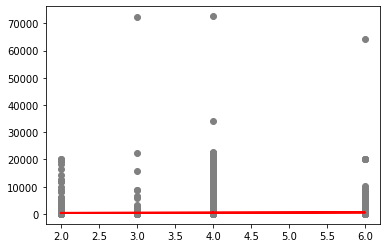

In [42]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [43]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 14918886.310946813
